In [1]:
import numpy as np 
import pandas as pd 

In [2]:
internet_ds = pd.read_csv("Darknet.CSV", keep_default_na = False,low_memory = False, error_bad_lines = False)
internet_ds

b'Skipping line 328: expected 85 fields, saw 125\n'


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP


In [3]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [4]:
reduce_mem_usage(internet_ds)

Memory usage after optimization is: 37.25 MB
Decreased by 59.4%


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3117718.25,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP


In [5]:
internet_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int32  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int32  
 5   Protocol                    141530 non-null  int8   
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int32  
 8   Total Fwd Packet            141530 non-null  int32  
 9   Total Bwd packets           141530 non-null  int32  
 10  Total Length of Fwd Packet  141530 non-null  int32  
 11  Total Length of Bwd Packet  141530 non-null  int32  
 12  Fwd Packet Length Max       141530 non-null  int32  
 13  Fwd Packet Len

In [6]:
internet_ds.rename(columns = {"Label" : "Type", "Label.1" : "Subtype"}, inplace = True)
internet_ds

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Type,Subtype
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3117718.25,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP


In [8]:
internet_ds["Type"].unique()

array(['Non-Tor', 'NonVPN', 'Tor', 'VPN'], dtype=object)

In [9]:
internet_ds["Subtype"].unique()

array(['AUDIO-STREAMING', 'Browsing', 'Chat', 'Email', 'File-Transfer',
       'File-transfer', 'P2P', 'Video-Streaming', 'Audio-Streaming',
       'Video-streaming', 'VOIP'], dtype=object)

In [10]:
internet_ds.groupby("Type")["Subtype"].unique()

Type
Non-Tor    [AUDIO-STREAMING, Browsing, Chat, Email, File-...
NonVPN     [Chat, Audio-Streaming, Email, File-Transfer, ...
Tor        [Audio-Streaming, Browsing, Chat, File-Transfe...
VPN        [File-Transfer, Chat, Audio-Streaming, Email, ...
Name: Subtype, dtype: object

In [11]:
internet_ds.groupby("Type")["Subtype"].nunique()

Type
Non-Tor    8
NonVPN     8
Tor        8
VPN        6
Name: Subtype, dtype: int64

In [12]:
internet_ds["Subtype"].loc[internet_ds["Subtype"] == "AUDIO-STREAMING"] = "Audio-Streaming"
internet_ds["Subtype"].loc[internet_ds["Subtype"] == "File-transfer"] = "File-Transfer"
internet_ds["Subtype"].loc[internet_ds["Subtype"] == "Video-streaming"] = "Video-Streaming"

/root/anaconda3/envs/exp1/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
internet_ds.groupby("Type")["Subtype"].unique()

Type
Non-Tor    [Audio-Streaming, Browsing, Chat, Email, File-...
NonVPN     [Chat, Audio-Streaming, Email, File-Transfer, ...
Tor        [Audio-Streaming, Browsing, Chat, File-Transfe...
VPN        [File-Transfer, Chat, Audio-Streaming, Email, ...
Name: Subtype, dtype: object

In [14]:
internet_ds.groupby("Type")["Subtype"].nunique()

Type
Non-Tor    7
NonVPN     6
Tor        8
VPN        6
Name: Subtype, dtype: int64

In [15]:
internet_ds.loc[:, "Encryption"] = ''
internet_ds

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Type,Subtype,Encryption
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,1.437765e+15,3117718.25,1.437765e+15,1.437765e+15,Non-Tor,Audio-Streaming,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,


In [16]:
internet_ds["Encryption"].loc[internet_ds["Type"] == "Non-Tor"] = "Standard"
internet_ds["Encryption"].loc[internet_ds["Type"] == "NonVPN"] = "Standard"

internet_ds["Encryption"].loc[internet_ds["Type"] == "Tor"] = "High"
internet_ds["Encryption"].loc[internet_ds["Type"] == "VPN"] = "High"

/root/anaconda3/envs/exp1/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [17]:
internet_ds

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Type,Subtype,Encryption
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,Standard
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,Standard
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,Standard
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,Standard
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,1.437765e+15,3117718.25,1.437765e+15,1.437765e+15,Non-Tor,Audio-Streaming,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,High
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,High
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,High
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,High


In [19]:
internet_ds.isnull().sum()


Flow ID       0
Src IP        0
Src Port      0
Dst IP        0
Dst Port      0
             ..
Idle Max      0
Idle Min      0
Type          0
Subtype       0
Encryption    0
Length: 86, dtype: int64

In [20]:
internet_ds.replace([np.inf, -np.inf], np.nan, inplace=True)

In [21]:
internet_ds.fillna(0, inplace = True)

In [23]:
internet_ds_test = internet_ds.copy()
internet_ds_test

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Type,Subtype,Encryption
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,Standard
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,Standard
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,Standard
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,Standard
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,1.437765e+15,3117718.25,1.437765e+15,1.437765e+15,Non-Tor,Audio-Streaming,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,High
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,High
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,High
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,High


In [24]:
internet_ds_test.drop(["Timestamp"],axis = 1,inplace = True)
internet_ds_test

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Type,Subtype,Encryption
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,229,1,1,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,Standard
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,407,1,1,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,Standard
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,431,1,1,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,Standard
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,359,1,1,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,Standard
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,10778451,591,400,64530,...,0,0,0,1.437765e+15,3117718.25,1.437765e+15,1.437765e+15,Non-Tor,Audio-Streaming,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,411806,2,0,44,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,High
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,411574,2,0,44,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,High
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,422299,2,0,44,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,High
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,411855,2,0,44,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,High


In [26]:
internet_ds_test = internet_ds_test.loc[:, internet_ds_test.apply(pd.Series.nunique) != 1]
internet_ds_test

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,...,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Type,Subtype,Encryption
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,229,1,1,0,...,1047,0,20,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,Standard
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,407,1,1,0,...,1047,0,20,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,Standard
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,431,1,1,0,...,1047,0,20,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,Standard
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,359,1,1,0,...,1047,0,20,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,Standard
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,10778451,591,400,64530,...,2320,581,20,1.437765e+15,3117718.25,1.437765e+15,1.437765e+15,Non-Tor,Audio-Streaming,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,411806,2,0,44,...,0,1,8,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,High
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,411574,2,0,44,...,0,1,8,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,High
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,422299,2,0,44,...,0,1,8,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,High
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,411855,2,0,44,...,0,1,8,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP,High


In [27]:
internet_ds_test.dtypes


Flow ID        object
Src IP         object
Src Port        int32
Dst IP         object
Dst Port        int32
               ...   
Idle Max      float32
Idle Min      float32
Type           object
Subtype        object
Encryption     object
Length: 70, dtype: object

In [28]:
internet_ds_test.drop(["Flow ID"],axis = 1,inplace = True)
internet_ds_test.drop(["Src IP"],axis = 1,inplace = True)
internet_ds_test.drop(["Dst IP"],axis = 1,inplace = True)
internet_ds_test.drop(["Src Port"],axis = 1,inplace = True)
internet_ds_test.drop(["Dst Port"],axis = 1,inplace = True)
internet_ds_test.drop(["Flow Duration"],axis = 1,inplace = True)

internet_ds_test.drop(["Idle Mean"],axis = 1,inplace = True)
internet_ds_test.drop(["Idle Std"],axis = 1,inplace = True)
internet_ds_test.drop(["Idle Max"],axis = 1,inplace = True)
internet_ds_test.drop(["Idle Min"],axis = 1,inplace = True)
internet_ds_test

/root/anaconda3/envs/exp1/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Protocol,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Type,Subtype,Encryption
0,6,1,1,0,0,0,0,0.0000,0.00000,0,...,0,0,0,1892,1047,0,20,Non-Tor,Audio-Streaming,Standard
1,6,1,1,0,0,0,0,0.0000,0.00000,0,...,0,0,0,1987,1047,0,20,Non-Tor,Audio-Streaming,Standard
2,6,1,1,0,0,0,0,0.0000,0.00000,0,...,0,0,0,2049,1047,0,20,Non-Tor,Audio-Streaming,Standard
3,6,1,1,0,0,0,0,0.0000,0.00000,0,...,0,0,0,2008,1047,0,20,Non-Tor,Audio-Streaming,Standard
4,6,591,400,64530,6659,131,0,109.1875,22.28125,498,...,0,65,6,1382,2320,581,20,Non-Tor,Audio-Streaming,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,17,2,0,44,0,22,22,22.0000,0.00000,0,...,1,22,0,0,0,1,8,VPN,VOIP,High
141526,17,2,0,44,0,22,22,22.0000,0.00000,0,...,1,22,0,0,0,1,8,VPN,VOIP,High
141527,17,2,0,44,0,22,22,22.0000,0.00000,0,...,1,22,0,0,0,1,8,VPN,VOIP,High
141528,17,2,0,44,0,22,22,22.0000,0.00000,0,...,1,22,0,0,0,1,8,VPN,VOIP,High


In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer as labBin

internet_ds_test["Encryption"] = internet_ds_test["Encryption"].map({"Standard":0,"High":+1})
internet_ds_test

/root/anaconda3/envs/exp1/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Protocol,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Type,Subtype,Encryption
0,6,1,1,0,0,0,0,0.0000,0.00000,0,...,0,0,0,1892,1047,0,20,Non-Tor,Audio-Streaming,0
1,6,1,1,0,0,0,0,0.0000,0.00000,0,...,0,0,0,1987,1047,0,20,Non-Tor,Audio-Streaming,0
2,6,1,1,0,0,0,0,0.0000,0.00000,0,...,0,0,0,2049,1047,0,20,Non-Tor,Audio-Streaming,0
3,6,1,1,0,0,0,0,0.0000,0.00000,0,...,0,0,0,2008,1047,0,20,Non-Tor,Audio-Streaming,0
4,6,591,400,64530,6659,131,0,109.1875,22.28125,498,...,0,65,6,1382,2320,581,20,Non-Tor,Audio-Streaming,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,17,2,0,44,0,22,22,22.0000,0.00000,0,...,1,22,0,0,0,1,8,VPN,VOIP,1
141526,17,2,0,44,0,22,22,22.0000,0.00000,0,...,1,22,0,0,0,1,8,VPN,VOIP,1
141527,17,2,0,44,0,22,22,22.0000,0.00000,0,...,1,22,0,0,0,1,8,VPN,VOIP,1
141528,17,2,0,44,0,22,22,22.0000,0.00000,0,...,1,22,0,0,0,1,8,VPN,VOIP,1


In [30]:
from sklearn.model_selection import train_test_split as t_t_s
from sklearn.preprocessing import StandardScaler as stdScal




X = internet_ds_test["Subtype"]

Y = internet_ds_test["Encryption"]


X_train, X_test, Y_train, Y_test = t_t_s(X, Y, test_size=0.30, random_state=42)



In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(sublinear_tf=True)

X_train_cnt = count_vect.fit_transform(X_train)
X_train_TF = transformer.fit_transform(X_train_cnt)
print(X_train_cnt.shape)
print(X_train_TF.shape)

X_test_cnt = count_vect.transform(X_test)
X_test_TF = transformer.transform(X_test_cnt)
print(X_test_cnt.shape)
print(X_test_TF.shape)

(99071, 10)
(99071, 10)
(42459, 10)
(42459, 10)


In [32]:
from sklearn.ensemble import RandomForestClassifier as RFClass
ranForModel = RFClass(n_estimators=10, criterion = "entropy")
ranForModel.fit(X_train_TF, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report as class_re
from sklearn.metrics import confusion_matrix as c_m
ranForPredict = ranForModel.predict(X_test_TF)
print("Predicted Class:",ranForPredict)
print("Confusion Matrix:\n",c_m(Y_test ,ranForPredict))
print("Accuracy:", accuracy_score(Y_test ,ranForPredict))
print("F_score:", f1_score(Y_test ,ranForPredict))
print("Classification Report:\n",class_re(Y_test ,ranForPredict))

Predicted Class: [0 0 0 ... 0 0 0]
Confusion Matrix:
 [[33750  1420]
 [ 3346  3943]]
Accuracy: 0.8877505358110177
F_score: 0.623300663926652
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     35170
           1       0.74      0.54      0.62      7289

    accuracy                           0.89     42459
   macro avg       0.82      0.75      0.78     42459
weighted avg       0.88      0.89      0.88     42459



In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score as acc_score
from sklearn.metrics import classification_report as class_re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as t_t_s
from sklearn.preprocessing import OneHotEncoder as ohe
subtypes = ['Audio-Streaming', 'Browsing', 'Chat', 'Email', 'File-Transfer', 'P2P', 'VOIP', 'Video-Streaming']
subtypes_ds = pd.DataFrame(subtypes, columns=['subtypes'])

encoder = ohe()


internet_ds_test["Subtype"] = internet_ds_test["Subtype"].astype('category')
internet_ds_test["Subtype_Encoded"] = internet_ds_test["Subtype"].cat.codes


internet_ds_test


/root/anaconda3/envs/exp1/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/root/anaconda3/envs/exp1/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Protocol,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Subflow Fwd Bytes,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Type,Subtype,Encryption,Subtype_Encoded
0,6,1,1,0,0,0,0,0.0000,0.00000,0,...,0,0,1892,1047,0,20,Non-Tor,Audio-Streaming,0,0
1,6,1,1,0,0,0,0,0.0000,0.00000,0,...,0,0,1987,1047,0,20,Non-Tor,Audio-Streaming,0,0
2,6,1,1,0,0,0,0,0.0000,0.00000,0,...,0,0,2049,1047,0,20,Non-Tor,Audio-Streaming,0,0
3,6,1,1,0,0,0,0,0.0000,0.00000,0,...,0,0,2008,1047,0,20,Non-Tor,Audio-Streaming,0,0
4,6,591,400,64530,6659,131,0,109.1875,22.28125,498,...,65,6,1382,2320,581,20,Non-Tor,Audio-Streaming,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,17,2,0,44,0,22,22,22.0000,0.00000,0,...,22,0,0,0,1,8,VPN,VOIP,1,6
141526,17,2,0,44,0,22,22,22.0000,0.00000,0,...,22,0,0,0,1,8,VPN,VOIP,1,6
141527,17,2,0,44,0,22,22,22.0000,0.00000,0,...,22,0,0,0,1,8,VPN,VOIP,1,6
141528,17,2,0,44,0,22,22,22.0000,0.00000,0,...,22,0,0,0,1,8,VPN,VOIP,1,6


In [36]:
ds_encoded = pd.DataFrame(encoder.fit_transform(internet_ds_test[['Subtype_Encoded']]).toarray())
ds_encoded

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
141525,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
141526,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
141527,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
141528,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
internet_ds_encoded = internet_ds_test[["Subtype","Subtype_Encoded","Type","Encryption"]].join(ds_encoded)

internet_ds_encoded

,Subtype,Subtype_Encoded,Type,Encryption,0,1,2,3,4,5,6,7
0,Audio-Streaming,0,Non-Tor,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Audio-Streaming,0,Non-Tor,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Audio-Streaming,0,Non-Tor,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Audio-Streaming,0,Non-Tor,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Audio-Streaming,0,Non-Tor,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
141525,VOIP,6,VPN,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
141526,VOIP,6,VPN,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
141527,VOIP,6,VPN,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
141528,VOIP,6,VPN,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
internet_ds_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   Subtype          141530 non-null  category
 1   Subtype_Encoded  141530 non-null  int8    
 2   Type             141530 non-null  object  
 3   Encryption       141530 non-null  int64   
 4   0                141530 non-null  float64 
 5   1                141530 non-null  float64 
 6   2                141530 non-null  float64 
 7   3                141530 non-null  float64 
 8   4                141530 non-null  float64 
 9   5                141530 non-null  float64 
 10  6                141530 non-null  float64 
 11  7                141530 non-null  float64 
dtypes: category(1), float64(8), int64(1), int8(1), object(1)
memory usage: 11.1+ MB


In [39]:
internet_ds_encoded.describe()

,Subtype_Encoded,Encryption,0,1,2,3,4,5,6,7
count,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000
mean,3.188667,0.171773,0.127634,0.231810,0.081099,0.043418,0.079008,0.342825,0.025196,0.069010
std,2.214207,0.377184,0.333683,0.421989,0.272989,0.203798,0.269752,0.474655,0.156721,0.253472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
internet_ds_encoded.isnull()

,Subtype,Subtype_Encoded,Type,Encryption,0,1,2,3,4,5,6,7
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
141525,False,False,False,False,False,False,False,False,False,False,False,False
141526,False,False,False,False,False,False,False,False,False,False,False,False
141527,False,False,False,False,False,False,False,False,False,False,False,False
141528,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
subtypes = ['Audio-Streaming', 'Browsing', 'Chat', 'Email', 'File-Transfer', 'P2P', 'VOIP', 'Video-Streaming']

internet_ds_encoded.rename(columns = {0 : "Audio-Streaming", 1 : "Browsing", 2 : "Chat", 3 : "Email", 4 : "File-Transfer", 5 : "P2P", 6 : "VOIP", 7 : "Video-Streaming"}, inplace = True)
internet_ds_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   Subtype          141530 non-null  category
 1   Subtype_Encoded  141530 non-null  int8    
 2   Type             141530 non-null  object  
 3   Encryption       141530 non-null  int64   
 4   Audio-Streaming  141530 non-null  float64 
 5   Browsing         141530 non-null  float64 
 6   Chat             141530 non-null  float64 
 7   Email            141530 non-null  float64 
 8   File-Transfer    141530 non-null  float64 
 9   P2P              141530 non-null  float64 
 10  VOIP             141530 non-null  float64 
 11  Video-Streaming  141530 non-null  float64 
dtypes: category(1), float64(8), int64(1), int8(1), object(1)
memory usage: 11.1+ MB


In [42]:
subtype = ["Audio-Streaming", "Browsing", "Chat", "Email", "File-Transfer", "P2P", "VOIP", "Video-Streaming"]

X = internet_ds_encoded[subtype]

X_std_scal = StandardScaler().fit_transform(X)

Y = internet_ds_encoded["Encryption"]

X_train, X_test, Y_train, Y_test = t_t_s(X_std_scal, Y, test_size = 0.33, random_state = 42)


DTreeClass = DecisionTreeClassifier(criterion = "entropy", random_state = 42)


DTreeClass.fit(X_train, Y_train)
Y_pred = DTreeClass.predict(X_test)
Y_scored = DTreeClass.score(X,Y)
Y_scored2 = DTreeClass.score(X_train,Y_train)
Y_scored3 = DTreeClass.score(X_test,Y_test)

In [47]:
Y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [48]:
Y_scored

0.8282272309757649

In [49]:
Y_scored2

0.8888162404429212

In [50]:
Y_scored3

0.8872925810941013

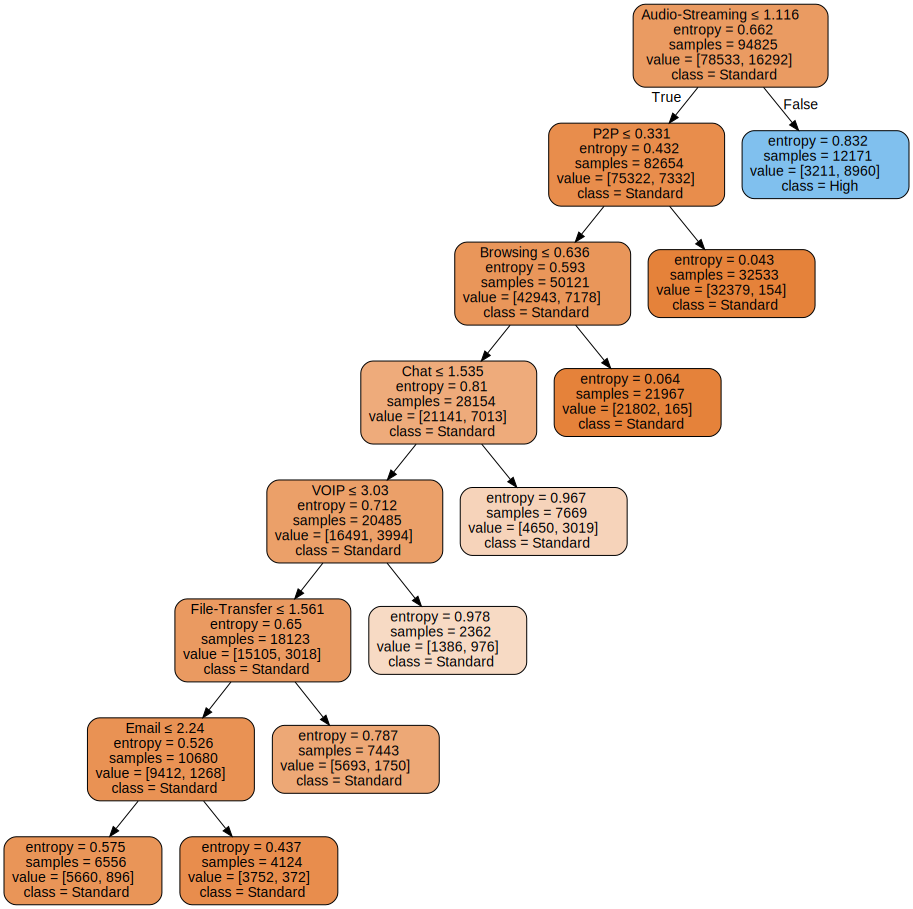

In [43]:
from sklearn.tree import export_graphviz
import graphviz

treePic = export_graphviz(DTreeClass, out_file = None, filled = True, rounded = True,special_characters = True, feature_names = subtypes ,class_names = ['Standard','High'])

graph = graphviz.Source(treePic)
graph.render("decision_tree", view = True)
graph

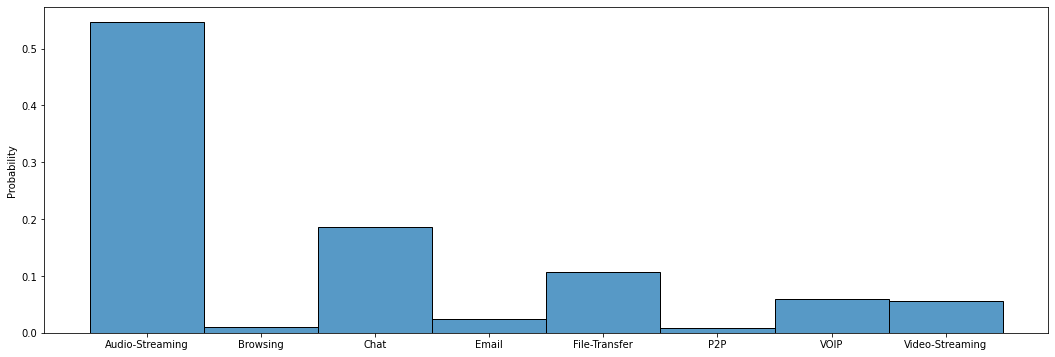

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (18,6)

sns.histplot(data=internet_ds_encoded[internet_ds_encoded['Encryption'] == +1], x="Subtype", stat="probability")
plt.xlabel('')
plt.show()

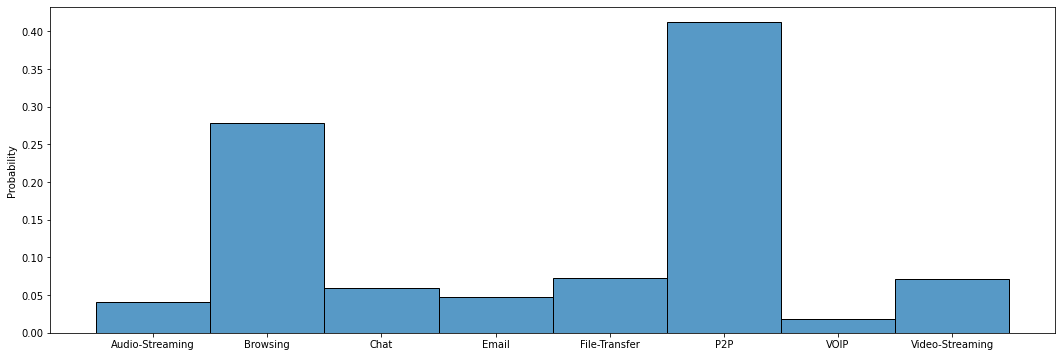

In [46]:
sns.histplot(data=internet_ds_encoded[internet_ds_encoded['Encryption'] == 0], x="Subtype", stat="probability")
plt.xlabel('')
plt.show()